<h2>Set up the Environment</h2>

In [3]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
# for modeling
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping


<h2>Fetch Our Data</h2>

In [4]:
df = pd.read_excel('Oral_health_care_dataset.xlsx').copy()
df.head(10)


,act_caries_p,Sido_No,Region_No,Gender,prev_caries_p,X1,X2,X3,X4_1,X4_2,...,X14_6,X14_7,X14_8,X14_9,x15_1,X16,act_caries_p.1,Calculus,Bleeding,Fluorosis
0,0,14,1,2,1,2,1,2,1,0,...,0,0,0,0,1,3,0,0,0,0
1,0,12,1,2,1,3,1,1,1,0,...,0,0,0,0,3,3,0,0,0,0
2,1,11,1,1,0,4,1,2,0,0,...,0,1,0,0,2,2,1,0,0,0
3,0,25,2,2,1,4,1,2,1,0,...,0,1,0,0,2,1,0,0,0,0
4,0,26,2,1,1,3,1,2,1,0,...,0,1,0,0,1,3,0,0,0,0
5,1,22,2,1,1,3,1,2,1,0,...,0,0,1,0,1,7,1,0,0,1
6,0,10,1,2,1,3,1,2,0,0,...,0,0,1,0,2,6,0,0,0,0
7,1,20,2,1,1,3,1,2,0,0,...,0,0,0,0,2,2,0,0,0,1
8,0,10,1,2,0,4,1,1,1,0,...,0,0,1,0,2,1,0,1,0,0
9,0,26,2,1,1,4,1,2,0,0,...,0,1,1,0,2,6,0,0,0,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22288 entries, 0 to 22287
Data columns (total 45 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   act_caries_p    22288 non-null  int64
 1   Sido_No         22288 non-null  int64
 2   Region_No       22288 non-null  int64
 3   Gender          22288 non-null  int64
 4   prev_caries_p   22288 non-null  int64
 5   X1              22288 non-null  int64
 6   X2              22288 non-null  int64
 7   X3              22288 non-null  int64
 8   X4_1            22288 non-null  int64
 9   X4_2            22288 non-null  int64
 10  X4_3            22288 non-null  int64
 11  X4_4            22288 non-null  int64
 12  X4_5            22288 non-null  int64
 13  X4_6            22288 non-null  int64
 14  X4_7            22288 non-null  int64
 15  X4_8            22288 non-null  int64
 16  X4_9            22288 non-null  int64
 17  X5_1            22288 non-null  int64
 18  X5_2            22288 non-

In [6]:
df['act_caries_p'].value_counts()

0    20593
1     1695
Name: act_caries_p, dtype: int64

In [7]:
df.head(10)

,act_caries_p,Sido_No,Region_No,Gender,prev_caries_p,X1,X2,X3,X4_1,X4_2,...,X14_6,X14_7,X14_8,X14_9,x15_1,X16,act_caries_p.1,Calculus,Bleeding,Fluorosis
0,0,14,1,2,1,2,1,2,1,0,...,0,0,0,0,1,3,0,0,0,0
1,0,12,1,2,1,3,1,1,1,0,...,0,0,0,0,3,3,0,0,0,0
2,1,11,1,1,0,4,1,2,0,0,...,0,1,0,0,2,2,1,0,0,0
3,0,25,2,2,1,4,1,2,1,0,...,0,1,0,0,2,1,0,0,0,0
4,0,26,2,1,1,3,1,2,1,0,...,0,1,0,0,1,3,0,0,0,0
5,1,22,2,1,1,3,1,2,1,0,...,0,0,1,0,1,7,1,0,0,1
6,0,10,1,2,1,3,1,2,0,0,...,0,0,1,0,2,6,0,0,0,0
7,1,20,2,1,1,3,1,2,0,0,...,0,0,0,0,2,2,0,0,0,1
8,0,10,1,2,0,4,1,1,1,0,...,0,0,1,0,2,1,0,1,0,0
9,0,26,2,1,1,4,1,2,0,0,...,0,1,1,0,2,6,0,0,0,1


In [8]:
import imblearn
print(imblearn.__version__)

0.8.0


In [9]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
# transform the dataset

df_new = df
df_new.shape

df_cut_cor=df_new.drop('act_caries_p',axis=1)
#df_cut_cor=df_new.drop('act_caries_p.1',axis=1)
df_cut_cor=df_cut_cor.drop('Region_No',axis=1)
df_scaled = df_cut_cor.copy()

Y = df_new['act_caries_p']
X = df_scaled

over = SMOTE(sampling_strategy=0.7)
#under = RandomUnderSampler(sampling_strategy=0.5)

#steps = [('o', over), ('u', under)]
#pipeline = Pipeline(steps=steps)

X, Y = over.fit_resample(X, Y)



In [10]:
from collections import Counter

# summarize the new class distribution
counter = Counter(Y)
print(counter)

Counter({0: 20593, 1: 14415})


<h2>Prepare Data for Modeling<h2>

<h2>Scale the dataset</h2>

In [11]:
# Import `StandardScaler` from `sklearn.preprocessing`
from sklearn.preprocessing import StandardScaler
# Define the scaler 
scaler = StandardScaler().fit(X)
# Scale the train set
X = scaler.transform(X)
# Define the scaler 
#scaler = StandardScaler().fit(X_train)

In [12]:
import numpy as np
#convert the data to numpy arrays
X = np.array(X)

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size = 0.20, random_state = 42)

In [14]:
from sklearn.feature_selection import SelectKBest, chi2,f_classif,mutual_info_classif
#sklearn.feature_selection.f_classif
# configure to select all features
fs = SelectKBest(score_func=f_classif, k='all')
# learn relationship from training data
fs.fit(X_train, y_train)
# transform train input data
X_train_fs = fs.transform(X_train)
# transform test input data
X_test_fs = fs.transform(X_test)

Feature 0: 141.575278
Feature 1: 1092.945206
Feature 2: 902.218389
Feature 3: 638.770311
Feature 4: 836.996619
Feature 5: 201.339039
Feature 6: 469.804198
Feature 7: 907.081037
Feature 8: 63.877542
Feature 9: 1029.392946
Feature 10: 203.875714
Feature 11: 713.276321
Feature 12: 513.156709
Feature 13: 485.892592
Feature 14: 38.871037
Feature 15: 107.242720
Feature 16: 119.464336
Feature 17: 93.360379
Feature 18: 151.467839
Feature 19: 386.255024
Feature 20: 15.758726
Feature 21: 59.160594
Feature 22: 296.683463
Feature 23: 347.522092
Feature 24: 172.473791
Feature 25: 284.340511
Feature 26: 749.312831
Feature 27: 26.579349
Feature 28: 365.313355
Feature 29: 691.311183
Feature 30: 134.599675
Feature 31: 118.225771
Feature 32: 126.539991
Feature 33: 120.222162
Feature 34: 366.577748
Feature 35: 878.912790
Feature 36: 231.408004
Feature 37: 698.599088
Feature 38: 185.248064
Feature 39: 328.662635
Feature 40: 444.239881
Feature 41: 647.213220
Feature 42: 406.844310


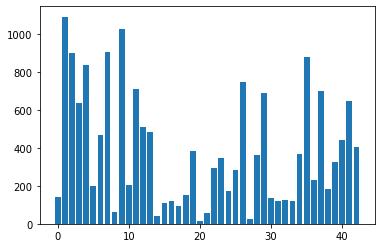

In [15]:
# what are scores for the features
for i in range(len(fs.scores_)):
	print('Feature %d: %f' % (i, fs.scores_[i]))
# plot the scores
plt.bar([i for i in range(len(fs.scores_))], fs.scores_)
plt.show()

In [16]:
# feature selection
def select_features(X_train, y_train, X_test):
	# configure to select all features
	fs = SelectKBest(score_func=mutual_info_classif, k='all')
	# learn relationship from training data
	fs.fit(X_train, y_train)
	# transform train input data
	X_train_fs = fs.transform(X_train)
	# transform test input data
	X_test_fs = fs.transform(X_test)
	return X_train_fs, X_test_fs, fs

Feature 0: 0.011609
Feature 1: 0.024861
Feature 2: 0.020177
Feature 3: 0.016027
Feature 4: 0.016656
Feature 5: 0.005708
Feature 6: 0.008990
Feature 7: 0.019264
Feature 8: 0.002329
Feature 9: 0.018532
Feature 10: 0.006015
Feature 11: 0.017114
Feature 12: 0.012322
Feature 13: 0.006122
Feature 14: 0.009484
Feature 15: 0.004962
Feature 16: 0.002072
Feature 17: 0.005778
Feature 18: 0.009279
Feature 19: 0.011876
Feature 20: 0.000000
Feature 21: 0.002543
Feature 22: 0.002240
Feature 23: 0.010723
Feature 24: 0.006148
Feature 25: 0.012152
Feature 26: 0.016502
Feature 27: 0.001120
Feature 28: 0.010882
Feature 29: 0.018624
Feature 30: 0.000749
Feature 31: 0.003705
Feature 32: 0.002630
Feature 33: 0.005083
Feature 34: 0.009077
Feature 35: 0.018480
Feature 36: 0.005792
Feature 37: 0.015601
Feature 38: 0.005475
Feature 39: 0.008928
Feature 40: 0.012767
Feature 41: 0.011633
Feature 42: 0.006608


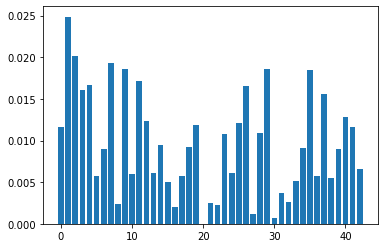

In [17]:
# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=1)
# feature selection
X_train_fs, X_test_fs, fs = select_features(X_train, y_train, X_test)
# what are scores for the features
for i in range(len(fs.scores_)):
	print('Feature %d: %f' % (i, fs.scores_[i]))
# plot the scores
plt.bar([i for i in range(len(fs.scores_))], fs.scores_)
plt.show()

In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# fit the model
model = LogisticRegression(C = 1, penalty ='l1', solver='liblinear')

model.fit(X_train, y_train)
# evaluate the model
yhat = model.predict(X_test)
# evaluate predictions
accuracy = accuracy_score(y_test, yhat)
print('Accuracy: %.2f' % (accuracy*100))

Accuracy: 81.71


<h2>model with ANOVA f score</h2>

In [20]:
# feature selection
def select_features(X_train, y_train, X_test):
	# configure to select a subset of features
	fs = SelectKBest(score_func=f_classif, k=35)
	# learn relationship from training data
	fs.fit(X_train, y_train)
	# transform train input data
	X_train_fs = fs.transform(X_train)
	# transform test input data
	X_test_fs = fs.transform(X_test)
	return X_train_fs, X_test_fs, fs

### Logistic Regression applied on dataset after feature reduction

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size = 0.33, random_state = 1)
# feature selection
X_train_fs, X_test_fs, fs = select_features(X_train, y_train, X_test)
# fit the model
model_LR = LogisticRegression(C = 1, penalty ='l1', solver='liblinear')
model_LR.fit(X_train_fs, y_train)
# evaluate the model
yhat = model_LR.predict(X_test_fs)
# evaluate predictions
accuracy = accuracy_score(y_test, yhat)
print('Accuracy: %.2f' % (accuracy*100))

Accuracy: 81.45


### Random Forest applied on dataset after feature reduction

In [24]:
from sklearn.ensemble import RandomForestClassifier
model_RF = RandomForestClassifier(
    max_depth = None,
    max_features ='auto',
    min_samples_leaf = 1,
    n_estimators = 160,
    n_jobs = -1,
    random_state = 42)
model_RF.fit(X_train_fs, y_train)
# evaluate the model
yhat = model_RF.predict(X_test_fs)
# evaluate predictions
accuracy = accuracy_score(y_test, yhat)
print('Accuracy: %.2f' % (accuracy*100))

Accuracy: 91.15


### GBDT applied on dataset after feature reduction

In [29]:
from sklearn.ensemble import GradientBoostingClassifier

model_GBDT = GradientBoostingClassifier(
    max_features='auto',
    #max_depth= None,
    min_samples_leaf= 2,
    max_depth= 5,
    learning_rate= 0.08, 
    n_estimators= 100,
    subsample= 0.85)
model_GBDT.fit(X_train_fs, y_train)
# evaluate the model
yhat = model_GBDT.predict(X_test_fs)
# evaluate predictions
accuracy = accuracy_score(y_test, yhat)
print('Accuracy: %.2f' % (accuracy*100))

Accuracy: 84.44


### SVM applied on dataset after feature reduction

In [31]:
from sklearn.svm import SVC
model_GBDT = SVC(
    C= 1000,
    gamma= 0.0001, 
    kernel= 'rbf',
    probability= True)
model_GBDT.fit(X_train_fs, y_train)
# evaluate the model
yhat = model_GBDT.predict(X_test_fs)
# evaluate predictions
accuracy = accuracy_score(y_test, yhat)
print('Accuracy: %.2f' % (accuracy*100))

Accuracy: 82.31
